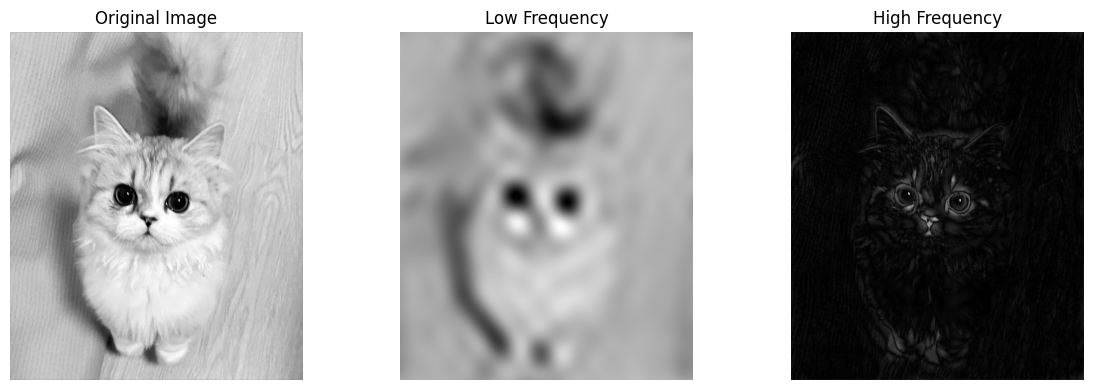

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# 图像路径，根据你的图片实际位置进行修改
image_path = './cat_fitting_2.png'

# 读取图像
image = imread(image_path)
if image.ndim == 3:
    # 转换为灰度图像
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

# 执行傅里叶变换并将零频率分量移至中心
f_transform = fftshift(fft2(image))

# 创建一个同样大小的掩模，中心为低频，四周为高频
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
low_freq_radius = 10  # 你可以调整这个半径大小来增减低频成分
mask[crow-low_freq_radius:crow+low_freq_radius, ccol-low_freq_radius:ccol+low_freq_radius] = 1

# 应用掩模提取低频成分
f_shift_low_freq = f_transform * mask
# 逆变换回图像空间
image_low_freq = np.abs(ifft2(ifftshift(f_shift_low_freq)))

# 提取高频成分，即掩模的补集
mask_high_freq = 1 - mask
f_shift_high_freq = f_transform * mask_high_freq
# 逆变换回图像空间
image_high_freq = np.abs(ifft2(ifftshift(f_shift_high_freq)))

# 显示结果
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Low Frequency")
plt.imshow(image_low_freq, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("High Frequency")
plt.imshow(image_high_freq, cmap='gray')
plt.axis('off')

plt.tight_layout()
# plt.show()
plt.savefig('low_high_freq.png', dpi=300)
